### Data Analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

In [9]:
ratings_df = pd.read_csv('u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])
movies_df = pd.read_csv('u.item', sep='|', encoding='latin-1', usecols=[0, 1, 2], names=['movieId', 'title', 'release_date'])[:]
users_df = pd.read_csv('u.user', sep='|', names=['userId', 'age', 'gender', 'occupation', 'zip_code'])[:]

# # Extract the all users' and all movies' ratings if you want to take few data.
# user_ids = users_df['userId'].values
# movie_ids = movies_df['movieId'].values
# ratings_df = ratings_df[(ratings_df['userId'].isin(user_ids)) & (ratings_df['movieId'].isin(movie_ids))]


In [10]:
ratings_df = pd.merge(ratings_df, movies_df, on='movieId')
ratings_df = pd.merge(ratings_df, users_df, on='userId')
ratings_df.shape

(100000, 10)

In [11]:
# movies = ratings_df.drop(['timestamp'], axis=1)
movies = ratings_df.loc[:, ['userId', 'movieId', 'rating', 'title']]
movies.head()

,userId,movieId,rating,title
0,196,242,3,Kolya (1996)
1,196,257,2,Men in Black (1997)
2,196,111,4,"Truth About Cats & Dogs, The (1996)"
3,196,25,4,"Birdcage, The (1996)"
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ..."


In [12]:
movies.info()
# movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   userId   100000 non-null  int64 
 1   movieId  100000 non-null  int64 
 2   rating   100000 non-null  int64 
 3   title    100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
movies.describe()

,userId,movieId,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [14]:
print('unique users:', movies['userId'].nunique())
print('unique movies:', movies['movieId'].nunique())


unique users: 943
unique movies: 1682


In [15]:
counts = movies['userId'].value_counts().reset_index()
counts.columns = ['User ID', 'Count']

print("User ID Counts:")
print(tabulate(counts, headers='keys', tablefmt='psql'))



User ID Counts:
+-----+-----------+---------+
|     |   User ID |   Count |
|-----+-----------+---------|
|   0 |       405 |     737 |
|   1 |       655 |     685 |
|   2 |        13 |     636 |
|   3 |       450 |     540 |
|   4 |       276 |     518 |
|   5 |       416 |     493 |
|   6 |       537 |     490 |
|   7 |       303 |     484 |
|   8 |       234 |     480 |
|   9 |       393 |     448 |
|  10 |       181 |     435 |
|  11 |       279 |     434 |
|  12 |       429 |     414 |
|  13 |       846 |     405 |
|  14 |         7 |     403 |
|  15 |        94 |     400 |
|  16 |       682 |     399 |
|  17 |       308 |     397 |
|  18 |       293 |     388 |
|  19 |        92 |     388 |
|  20 |       222 |     387 |
|  21 |       201 |     386 |
|  22 |        59 |     382 |
|  23 |       435 |     379 |
|  24 |       378 |     375 |
|  25 |       880 |     368 |
|  26 |       417 |     365 |
|  27 |       896 |     362 |
|  28 |       592 |     360 |
|  29 |       796 |     

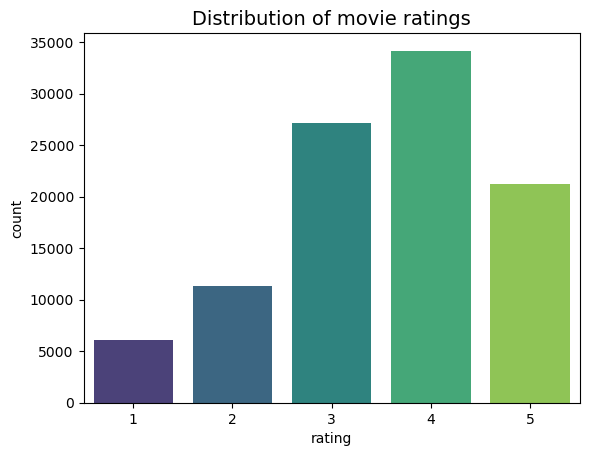

In [16]:
import seaborn as sns
sns.countplot(x="rating", data=movies, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

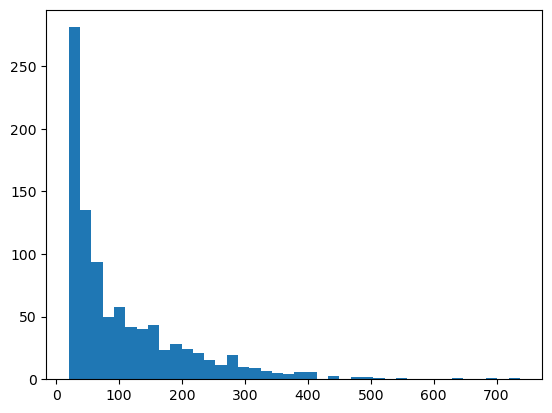

In [17]:
interactions = movies.groupby('userId').count()['movieId']
plt.hist(interactions, bins=40)
plt.show()

In [18]:
interactions_matrix = movies.pivot(index='userId', columns='movieId', values='rating').fillna(0)
interactions_matrix.head()


movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
interactions_matrix.shape

(943, 1682)

### User Based CF, It will show MAE, RMSE Score with recommended movie list

In [29]:
from sklearn.metrics import mean_squared_error

def load_data():
    ratings = {}
    with open('u.data') as file:
        for line in file:
            user_id, movie_id, rating, timestamp = line.split('\t')
            user_id = int(user_id)
            movie_id = int(movie_id)
            rating = float(rating)
            timestamp = int(timestamp)
            if user_id not in ratings:
                ratings[user_id] = {}
            ratings[user_id][movie_id] = (rating, timestamp)
    
    movie_titles = {}
    with open('u.item', encoding='ISO-8859-1') as file:
        for line in file:
            movie_id, movie_title = line.split('|')[:2]
            movie_id = int(movie_id)
            movie_titles[movie_id] = movie_title
    
    return ratings, movie_titles

def train_test_split(ratings, test_ratio=0.2):
    train = {}
    test = []
    for user_id in ratings:
        train[user_id] = {}
        for movie_id in ratings[user_id]:
            if np.random.random() < test_ratio:
                test.append((user_id, movie_id, ratings[user_id][movie_id]))
            else:
                train[user_id][movie_id] = ratings[user_id][movie_id]
    return train, test

def compute_similarity(user1, user2):
    common_movies = set(user1.keys()).intersection(user2.keys())
    if len(common_movies) == 0:
        return 0.0
    dot_product = sum(user1[movie_id][0] * user2[movie_id][0] for movie_id in common_movies)
    norm_user1 = np.linalg.norm([rating[0] for rating in user1.values()])
    norm_user2 = np.linalg.norm([rating[0] for rating in user2.values()])
    return dot_product / (norm_user1 * norm_user2)

def predict_rating(user_id, movie_id, train_data, similarity_matrix):
    numerator = 0.0
    denominator = 0.0
    for other_user_id in train_data:
        if other_user_id == user_id:
            continue
        if movie_id in train_data[other_user_id]:
            similarity = similarity_matrix[user_id][other_user_id]
            rating = train_data[other_user_id][movie_id][0]
            numerator += similarity * rating
            denominator += abs(similarity)
    if denominator == 0.0:
        return 0.0
    return numerator / denominator

def generate_recommendations(user_id, train_data, similarity_matrix, movie_titles, top_n=10):
    predicted_ratings = []
    for movie_id in movie_titles:
        if movie_id not in train_data[user_id]:
            predicted_rating = predict_rating(user_id, movie_id, train_data, similarity_matrix)
            predicted_ratings.append((movie_id, predicted_rating))
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = predicted_ratings[:top_n]
    recommended_movies = [(movie_titles[movie_id], predicted_rating) for movie_id, predicted_rating in top_recommendations]
    return recommended_movies

def evaluate_model(predictions, test_data):
    true_ratings = []
    predicted_ratings = []
    for user_id, movie_id, (true_rating, _) in test_data: 
        predicted_rating = predictions[user_id][movie_id]
        true_ratings.append(true_rating)
        predicted_ratings.append(predicted_rating)
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    mae = np.mean(np.abs(np.array(true_ratings) - np.array(predicted_ratings)))
    return rmse, mae

ratings, movie_titles = load_data()
train_data, test_data = train_test_split(ratings)

similarity_matrix = {}
for user1 in train_data:
    similarity_matrix[user1] = {}
    for user2 in train_data:
        similarity = compute_similarity(train_data[user1], train_data[user2])
        similarity_matrix[user1][user2] = similarity

user_id = 1
top_n = 10 

recommendations = generate_recommendations(user_id, train_data, similarity_matrix, movie_titles, top_n)

predictions = {}
for user_id, movie_id, rating in test_data:
    if user_id not in predictions:
        predictions[user_id] = {}
    predictions[user_id][movie_id] = predict_rating(user_id, movie_id, train_data, similarity_matrix)

rmse, mae = evaluate_model(predictions, test_data)
print(f"\nEvaluation Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}/n")

print(f"Top-{top_n} recommendations for user {user_id}:")
for idx, (movie_title, predicted_rating) in enumerate(recommendations):
    print(f"{idx+1}. Movie: {movie_title}, Predicted Rating: {predicted_rating}")



Evaluation Metrics:
RMSE: 1.030053171788539
MAE: 0.8184166355787451/n
Top-10 recommendations for user 941:
1. Movie: They Made Me a Criminal (1939), Predicted Rating: 5.0
2. Movie: Prefontaine (1997), Predicted Rating: 5.0
3. Movie: Marlene Dietrich: Shadow and Light (1996) , Predicted Rating: 5.0
4. Movie: Star Kid (1997), Predicted Rating: 5.0
5. Movie: Faust (1994), Predicted Rating: 5.0
6. Movie: Saint of Fort Washington, The (1993), Predicted Rating: 5.0
7. Movie: Santa with Muscles (1996), Predicted Rating: 5.0
8. Movie: Aiqing wansui (1994), Predicted Rating: 5.0
9. Movie: Someone Else's America (1995), Predicted Rating: 5.0
10. Movie: Boys, Les (1997), Predicted Rating: 4.905437405109671


### User-based CF, It will show only MAE, RMSE Score not show recommended movie list

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

class ItemBasedCF:
    def __init__(self, k_similar_items=2):
        self.k_similar_items = k_similar_items
        self.item_similarity_matrix = None

    def fit(self, X):
        item_ratings = X
        num_items = item_ratings.shape[0]
        self.item_similarity_matrix = np.zeros((num_items, num_items))
        for i in range(num_items):
            for j in range(i+1, num_items):
                similarity = self.calculate_similarity(item_ratings[i], item_ratings[j])
                self.item_similarity_matrix[i][j] = similarity
                self.item_similarity_matrix[j][i] = similarity
        # print("Similarity matrix")
        # print(self.item_similarity_matrix)

    def calculate_similarity(self, ratings1, ratings2):
        nonzero_indices = np.logical_and(ratings1 != 0, ratings2 != 0)
        if np.sum(nonzero_indices) == 0:
            return 0.0
        ratings1 = ratings1[nonzero_indices]
        ratings2 = ratings2[nonzero_indices]
        similarity = np.dot(ratings1, ratings2) / (np.linalg.norm(ratings1) * np.linalg.norm(ratings2))
        return similarity

    def predict(self, X, user_index):
        user_ratings = X[user_index]
        predicted_ratings = np.zeros(user_ratings.shape)
        for i in range(len(user_ratings)):
            if user_ratings[i] == 0:
                ratings = X[:, i]
                nonzero_indices = np.nonzero(ratings)[0]
                similarities = self.item_similarity_matrix[i, nonzero_indices]
                top_k_indices = np.argsort(similarities)[-self.k_similar_items:]
                predicted_ratings[i] = np.sum(similarities[top_k_indices] * ratings[nonzero_indices][top_k_indices]) / np.sum(np.abs(similarities[top_k_indices]))
        return predicted_ratings

    def recommend_items(self, X, user_index, n=2):
        predicted_ratings = self.predict(X, user_index)
        top_indices = np.argsort(predicted_ratings)[::-1][:n]
        return top_indices

data_path = "movieLens.csv"  
data = pd.read_csv(data_path, sep=',', header=None)
num_users = data[0].nunique()
num_items = data[1].nunique()

user_item_matrix = np.zeros((num_users, num_items))
for row in data.itertuples(index=False):
    user_id = row[0] - 1
    item_id = row[1] - 1
    rating = row[2]
    user_item_matrix[user_id, item_id] = rating
    
# print(user_item_matrix)
    
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# print(train_matrix)
# print(test_matrix)
item_cf = ItemBasedCF()
item_cf.fit(train_matrix)
mae_scores = []
rmse_scores = []

test_matrix = test_matrix
x = test_matrix.shape[0]
# print(test_matrix.shape)
for i in range(x):
    user_index = i
    
    predicted_ratings = item_cf.predict(test_matrix, user_index)
    true_ratings = test_matrix[user_index]
    
    predicted_ratings = pd.DataFrame(predicted_ratings)
    predicted_ratings = predicted_ratings.fillna(0)
    
    # print("True rating:", true_ratings)
    # print("Predect rating:",predicted_ratings)
    
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Recommend top 5 items for the user
# recommended_items = item_cf.recommend_items(user_item_matrix, user_index, n=3)

print("Average MAE:", np.mean(mae_scores))
print("Average RMSE:", np.mean(rmse_scores))
# print("Recommended Items:", recommended_items)


Average MAE: 1.9166666666666667
Average RMSE: 2.2130443865436704


### Item-based CF, It will show only MAE, RMSE Score not show recommended movie list

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

class ItemBasedCF:
    def __init__(self, k_similar_items=2):
        self.k_similar_items = k_similar_items
        self.item_similarity_matrix = None

    def fit(self, X):
        item_ratings = X.T
        num_items = item_ratings.shape[0]
        self.item_similarity_matrix = np.zeros((num_items, num_items))
        for i in range(num_items):
            for j in range(i+1, num_items):
                similarity = self.calculate_similarity(item_ratings[i], item_ratings[j])
                self.item_similarity_matrix[i][j] = similarity
                self.item_similarity_matrix[j][i] = similarity
        # print(self.item_similarity_matrix)

    def calculate_similarity(self, ratings1, ratings2):
        nonzero_indices = np.logical_and(ratings1 != 0, ratings2 != 0)
        if np.sum(nonzero_indices) == 0:
            return 0.0
        ratings1 = ratings1[nonzero_indices]
        ratings2 = ratings2[nonzero_indices]
        similarity = np.dot(ratings1, ratings2) / (np.linalg.norm(ratings1) * np.linalg.norm(ratings2))
        return similarity

    def predict(self, X, user_index):
        user_ratings = X[user_index]
        predicted_ratings = np.zeros(user_ratings.shape)
        for i in range(len(user_ratings)):
            if user_ratings[i] == 0:
                ratings = X[:, i]
                nonzero_indices = np.nonzero(ratings)[0]
                similarities = self.item_similarity_matrix[i, nonzero_indices]
                top_k_indices = np.argsort(similarities)[-self.k_similar_items:]
                predicted_ratings[i] = np.sum(similarities[top_k_indices] * ratings[nonzero_indices][top_k_indices]) / np.sum(np.abs(similarities[top_k_indices]))
        return predicted_ratings

    # def recommend_items(self, user_index, n=2):
    #     # Recommend top-n items for a given user
    #     predicted_ratings = self.predict(user_index)
    #     top_indices = np.argsort(predicted_ratings)[::-1][:n]
    #     return top_indices


data_path = "movieLens.csv"  
data = pd.read_csv(data_path, sep=',', header=None)
num_users = data[0].nunique()
num_items = data[1].nunique()


user_item_matrix = np.zeros((num_users, num_items))
for row in data.itertuples(index=False):
    user_id = row[0] - 1
    item_id = row[1] - 1
    rating = row[2]
    user_item_matrix[user_id, item_id] = rating
    
# print(user_item_matrix)
    
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# print(train_matrix)
# print(test_matrix)
item_cf = ItemBasedCF()

item_cf.fit(train_matrix)

mae_scores = []
rmse_scores = []

test_matrix = test_matrix
x = test_matrix.shape[0]
# print(test_matrix.shape)
for i in range(x):
    user_index = i
    
    predicted_ratings = item_cf.predict(test_matrix, user_index)
    true_ratings = test_matrix[user_index]
    
    predicted_ratings = pd.DataFrame(predicted_ratings)
    predicted_ratings = predicted_ratings.fillna(0)
    
    # print("True rating:", true_ratings)
    # print("Predect rating:",predicted_ratings)
    
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# # Recommend top 5 items for the user
# recommended_items = item_cf.recommend_items(user_item_matrix, user_index, n=)

# Print the average MAE and RMSE scores
print("Average MAE:", np.mean(mae_scores))
print("Average RMSE:", np.mean(rmse_scores))
# print("Recommended Items:", recommended_items)


Average MAE: 2.138888888888889
Average RMSE: 2.3380064832408674


### Page-Rank

In [7]:
from sklearn.model_selection import train_test_split

data = np.genfromtxt('u.data', delimiter='\t', dtype=int)
item_names = np.genfromtxt('u.item', delimiter='|', dtype=str, encoding='ISO-8859-1')

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

user_ids_train = data_train[:, 0]
item_ids_train = data_train[:, 1]
user_ids_test = data_test[:, 0]
item_ids_test = data_test[:, 1]

num_users = np.max(user_ids_train) + 1
num_items_train = np.max(item_ids_train) + 1  
num_items_test = np.max(item_ids_test) + 1  

num_items = max(num_items_train, num_items_test)  

interaction_matrix = np.zeros((num_users, num_items))
for user_id, item_id in zip(user_ids_train, item_ids_train):
    interaction_matrix[user_id, item_id] = 1

damping_factor = 0.85
max_iterations = 100

pagerank_scores = np.ones(num_items) / num_items
for _ in range(max_iterations):
    pagerank_scores_new = np.zeros(num_items)
    for user_id, item_id in zip(user_ids_train, item_ids_train):
        pagerank_scores_new[item_id] += pagerank_scores[user_id] / np.sum(interaction_matrix[user_id])
    pagerank_scores = (1 - damping_factor) / num_items + damping_factor * pagerank_scores_new

user_id = 1
user_interactions = np.where(interaction_matrix[user_id] == 1)[0]

recommendations = sorted(range(num_items), key=lambda x: pagerank_scores[x], reverse=True)
recommendations = [item_id for item_id in recommendations if item_id not in user_interactions]

ground_truth = set(item_ids_test)

y_true = [int(item_id in ground_truth) for item_id in recommendations]

def average_precision(y_true):
    num_correct = 0
    precision_sum = 0
    for i, y in enumerate(y_true):
        if y == 1:
            num_correct += 1
            precision_sum += num_correct / (i + 1)
    if num_correct == 0:
        return 0
    return precision_sum / num_correct

map_score = average_precision(y_true)
print("MAP Score:", map_score)

predicted_ratings = pagerank_scores[item_ids_test]
actual_ratings = np.ones_like(predicted_ratings)
rmse = np.sqrt(np.mean((predicted_ratings - actual_ratings) ** 2))
print("RMSE:", rmse)

print("Top 10 Recommendations:")
for item_id in recommendations[:10]:
    movie_name = item_names[item_id][1] 
    print(item_id, movie_name)


MAP Score: 0.973981178393326
RMSE: 0.9992803440986927
Top 10 Recommendations:
286 Marvin's Room (1996)
258 George of the Jungle (1997)
300 In & Out (1997)
288 Evita (1996)
294 Breakdown (1997)
100 Heavy Metal (1981)
313 3 Ninjas: High Noon At Mega Mountain (1998)
181 GoodFellas (1990)
328 Desperate Measures (1998)
748 MatchMaker, The (1997)


### Using Surprice library

#### All Type possible using Surprice library

In [21]:
import pandas as pd
from surprise import Dataset
from surprise import SVD
from surprise import KNNBasic
from surprise import CoClustering
from surprise import SlopeOne
from surprise import NMF
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.2)

# SVD (Singular Value Decomposition)
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)

# KNNBasic (K-Nearest Neighbors)
algo_knn = KNNBasic()
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
rmse_knn = accuracy.rmse(predictions_knn)
mae_knn = accuracy.mae(predictions_knn)

# BaselineOnly
algo_baseline = BaselineOnly()
algo_baseline.fit(trainset)
predictions_baseline = algo_baseline.test(testset)
rmse_baseline = accuracy.rmse(predictions_baseline)

# KNNBaseline
algo_knnbaseline = KNNBaseline()
algo_knnbaseline.fit(trainset)
predictions_knnbaseline = algo_knnbaseline.test(testset)
rmse_knnbaseline = accuracy.rmse(predictions_knnbaseline)

# KNNWithMeans
algo_knnmeans = KNNWithMeans()
algo_knnmeans.fit(trainset)
predictions_knnmeans = algo_knnmeans.test(testset)
rmse_knnmeans = accuracy.rmse(predictions_knnmeans)

# SVD with Bias
algo_bias = SVD(biased=True)
algo_bias.fit(trainset)
predictions_bias = algo_bias.test(testset)
rmse_bias = accuracy.rmse(predictions_bias)

# KNNBaseline with MSA (Mean Squared Difference Similarity)
sim_options = {'name': 'msd', 'user_based': False}
algo_knnmsa = KNNBaseline(sim_options=sim_options)
algo_knnmsa.fit(trainset)
predictions_knnmsa = algo_knnmsa.test(testset)
rmse_knnmsa = accuracy.rmse(predictions_knnmsa)

# KNNBaseline with MSD (Mean Squared Difference Similarity)
sim_options = {'name': 'msd', 'user_based': True}
algo_knnmsd = KNNBaseline(sim_options=sim_options)
algo_knnmsd.fit(trainset)
predictions_knnmsd = algo_knnmsd.test(testset)
rmse_knnmsd = accuracy.rmse(predictions_knnmsd)

# KNNBaseline with COSINE (Cosine Similarity)
sim_options = {'name': 'cosine', 'user_based': True}
algo_knncosine = KNNBaseline(sim_options=sim_options)
algo_knncosine.fit(trainset)
predictions_knncosine = algo_knncosine.test(testset)
rmse_knncosine = accuracy.rmse(predictions_knncosine)

# KNNBaseline with PEARSON (Pearson Similarity)
sim_options = {'name': 'pearson', 'user_based': True}
algo_knnpearson = KNNBaseline(sim_options=sim_options)
algo_knnpearson.fit(trainset)
predictions_knnpearson = algo_knnpearson

# KNNBaseline with PEARSON (Pearson Similarity)
sim_options = {'name': 'pearson', 'user_based': True}
algo_knnpearson = KNNBaseline(sim_options=sim_options)
algo_knnpearson.fit(trainset)
predictions_knnpearson = algo_knnpearson.test(testset)
rmse_knnpearson = accuracy.rmse(predictions_knnpearson)

# KNNBaseline with PEARSON Baseline (Pearson Baseline Similarity)
sim_options = {'name': 'pearson_baseline', 'user_based': True}
algo_knnpearsonbaseline = KNNBaseline(sim_options=sim_options)
algo_knnpearsonbaseline.fit(trainset)
predictions_knnpearsonbaseline = algo_knnpearsonbaseline.test(testset)
rmse_knnpearsonbaseline = accuracy.rmse(predictions_knnpearsonbaseline)


# KNNBaseline with Item-Based Collaborative Filtering
sim_options = {'name': 'pearson', 'user_based': False}
algo_knnitem = KNNBaseline(sim_options=sim_options)
algo_knnitem.fit(trainset)
predictions_knnitem = algo_knnitem.test(testset)
rmse_knnitem = accuracy.rmse(predictions_knnitem)


RMSE: 0.9424
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9860
MAE:  0.7761
Estimating biases using als...
RMSE: 0.9501
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9362
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9558
RMSE: 0.9401
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9372
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9362
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9397
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9379
Estimating biases using als...
Computing the 

#### Only User Based

In [5]:
from surprise import Dataset
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)
recommender = KNNBasic(k=5, sim_options={'name': 'cosine', 'user_based': True})

recommender.fit(trainset)

from surprise import accuracy

predictions = recommender.test(testset)

mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

user_id = '2'
item_ids = [str(item_id) for item_id in range(1, trainset.n_items)]
user_items = trainset.ur[trainset.to_inner_uid(user_id)]
neighbors = recommender.get_neighbors(user_items[0][0], k=5)

print("Recommended Movies:")
for item_id in neighbors:
    print(trainset.to_raw_iid(item_id))


Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.8619
RMSE: 1.0936
Recommended Movies:
808
1353
1625
645
1129


#### Only Item Based

In [4]:
from surprise import Dataset
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.25)

recommender = KNNBasic(k=5, sim_options={'name': 'cosine', 'user_based': False})
recommender.fit(trainset)

from surprise import accuracy

predictions = recommender.test(testset)

mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

user_id = '2'
item_ids = [str(item_id) for item_id in range(1, trainset.n_items)]
user_items = trainset.ur[trainset.to_inner_uid(user_id)]
neighbors = recommender.get_neighbors(user_items[0][0], k=5)

print("Recommended Movies:")
for item_id in neighbors:
    print(trainset.to_raw_iid(item_id))


Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.9326
RMSE: 1.1775
Recommended Movies:
1223
1298
1005
138
1453
